In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [2]:
%matplotlib notebook

In [3]:
from astropy import units
from astropy.coordinates import SkyCoord

In [4]:
with open('stars.json') as f:
    stars = json.load(f)

In [6]:
df = pd.DataFrame(stars)

# append a distance in pc column
def get_dist_in_pc(star):
    unit = star['Distance_unit']
    if unit == 'pc':
        return star['Distance_distance']
    elif unit == 'kpc':
        return star['Distance_distance'] * 1000.0
    else:
        return np.NAN

distances = [get_dist_in_pc(star) for i, star in df.iterrows()]
df = df.assign(distance=distances)

df.head()

,id,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,...,Distance_method,Distance_bibcode,GALDIM_MAJAXIS,GALDIM_MINAXIS,GALDIM_ANGLE,Z_VALUE,OTYPES,FLUX_V,FLUX_B,distance
0,HD 200253,21 01 12.8644,+36 01 33.647,14,14,0.0308,0.0386,90,A,O,...,paral,2018yCat.1345....0G,NaN,NaN,0,-0.000029,*|IR,5.997,7.00,183.9994
1,* 61 Cyg B,21 06 55.2640,+38 44 31.362,14,14,0.0437,0.0481,90,A,O,...,paral,2018yCat.1345....0G,NaN,NaN,0,-0.000214,**|*|PM*|PM*|V*|Fl*|Ro*|IR|X,6.030,7.40,3.4947
2,* tau Cyg,21 14 47.4925,+38 02 43.144,9,9,2.6400,2.6400,90,A,O,...,,,0.015,0.0,213,-0.000070,**|*|PM*|PM*|V*|dS*|IR|UV|UV|X,3.730,4.12,NaN
3,* tau Cyg A,21 14 47.5031,+38 02 43.610,14,14,0.3419,0.4304,90,A,O,...,paral,2018yCat.1345....0G,NaN,NaN,0,NaN,**|*|PM*,3.830,4.23,20.1709
4,* tau Cyg B,21 14 47.4627,+38 02 44.140,10,10,34.0000,34.0000,90,B,O,...,,,NaN,NaN,0,NaN,**|*|PM*,6.570,7.50,NaN


In [7]:
print(df.columns)

print("RA:", df['RA'][0], "\nDEC:", df['DEC'][0])
print(df['RA'][0].split(' '))
print(df['DEC'][0].split(' '))

print('weird RA:')
for i, ra in enumerate(df['RA']):
    pieces = ra.split(' ')
    if len(pieces) != 3: print(i)

print('weird DEC:')
for i, ra in enumerate(df['DEC']):
    pieces = ra.split(' ')
    if len(pieces) != 3: print(i)

Index(['id', 'RA', 'DEC', 'RA_PREC', 'DEC_PREC', 'COO_ERR_MAJA',
       'COO_ERR_MINA', 'COO_ERR_ANGLE', 'COO_QUAL', 'COO_WAVELENGTH',
       'COO_BIBCODE', 'Distance_distance', 'Distance_Q', 'Distance_unit',
       'Distance_merr', 'Distance_perr', 'Distance_method', 'Distance_bibcode',
       'GALDIM_MAJAXIS', 'GALDIM_MINAXIS', 'GALDIM_ANGLE', 'Z_VALUE', 'OTYPES',
       'FLUX_V', 'FLUX_B', 'distance'],
      dtype='object')
RA: 21 01 12.8644 
DEC: +36 01 33.647
['21', '01', '12.8644']
['+36', '01', '33.647']
weird RA:
2889
2891
2893
2899
2913
2921
2980
2981
2983
2984
2985
2992
3052
3055
3069
3070
3076
3081
3082
3086
3087
3138
3155
3156
3169
3170
3171
3172
3173
3175
3176
3225
3233
3234
3235
3236
3251
3252
3254
3255
3314
3315
3322
3323
3327
3328
3400
3401
3412
3413
3414
3415
3476
3477
3562
3626
3627
6330
6400
6403
6411
6488
6497
6502
9028
9335
9336
9340
9444
9454
9457
9458
9461
9462
9465
9469
9471
9472
9475
9556
9578
9705
9713
9714
9715
9725
9727
9808
9907
9909
weird DEC:
2144
2248
22

In [19]:
df.columns

Index(['id', 'RA', 'DEC', 'RA_PREC', 'DEC_PREC', 'COO_ERR_MAJA',
       'COO_ERR_MINA', 'COO_ERR_ANGLE', 'COO_QUAL', 'COO_WAVELENGTH',
       'COO_BIBCODE', 'Distance_distance', 'Distance_Q', 'Distance_unit',
       'Distance_merr', 'Distance_perr', 'Distance_method', 'Distance_bibcode',
       'GALDIM_MAJAXIS', 'GALDIM_MINAXIS', 'GALDIM_ANGLE', 'Z_VALUE', 'OTYPES',
       'FLUX_V', 'FLUX_B', 'distance'],
      dtype='object')

In [9]:
def ra_to_rad(ra):
    """ right ascension in hhmmss.s to radians """
    # RA is a string formatted as hh mm ss.ssss
    pieces = ra.split(' ')
    if len(pieces) == 3:
        hrs = float(pieces[0])
        mins = float(pieces[1])
        secs = float(pieces[2])
    elif len(pieces) == 2:
        hrs = 0.0
        mins = float(pieces[0])
        secs = float(pieces[1])

    degree = hrs*(360/24.0) + mins*(360/(24*60.0)) + secs*(360/(24*3600.0))
    rad = degree*(np.pi/180.0)
    return rad

def dec_to_rad(dec):
    """ declination in damas to radians
    dec is a string formatted as (+/-)dd am as.sss
    """
    sign = 1.0 if dec[0] == '+' else -1.0
    
    pieces = dec.split(' ')
    if len(pieces) == 3:
        degs = float(pieces[0][1:])
        mins = float(pieces[1])
        secs = float(pieces[2])
    elif len(pieces) == 2:
        degs = float(pieces[0][1:]);
        if '.' in pieces[1]:
            mins = 0.0
            secs = float(pieces[1])
        else:
            mins = float(pieces[1])
            secs = 0.0

    degree = sign * (degs + mins/60.0 + secs/3600.0)
    rad = degree * (np.pi/180.0)
    return rad

def make_hist(df, key, space=25, convert=float, scale=None):
    if key is not None:
        objs = [convert(o) for o in df[key].dropna()]
    else:
        objs = df
    if scale == "log":
        bins = np.geomspace(min(objs), max(objs), space)
    else:
        bins = np.linspace(min(objs), max(objs), space)
    plt.title(key)
    return plt.hist(objs, bins)

<IPython.core.display.Javascript object>


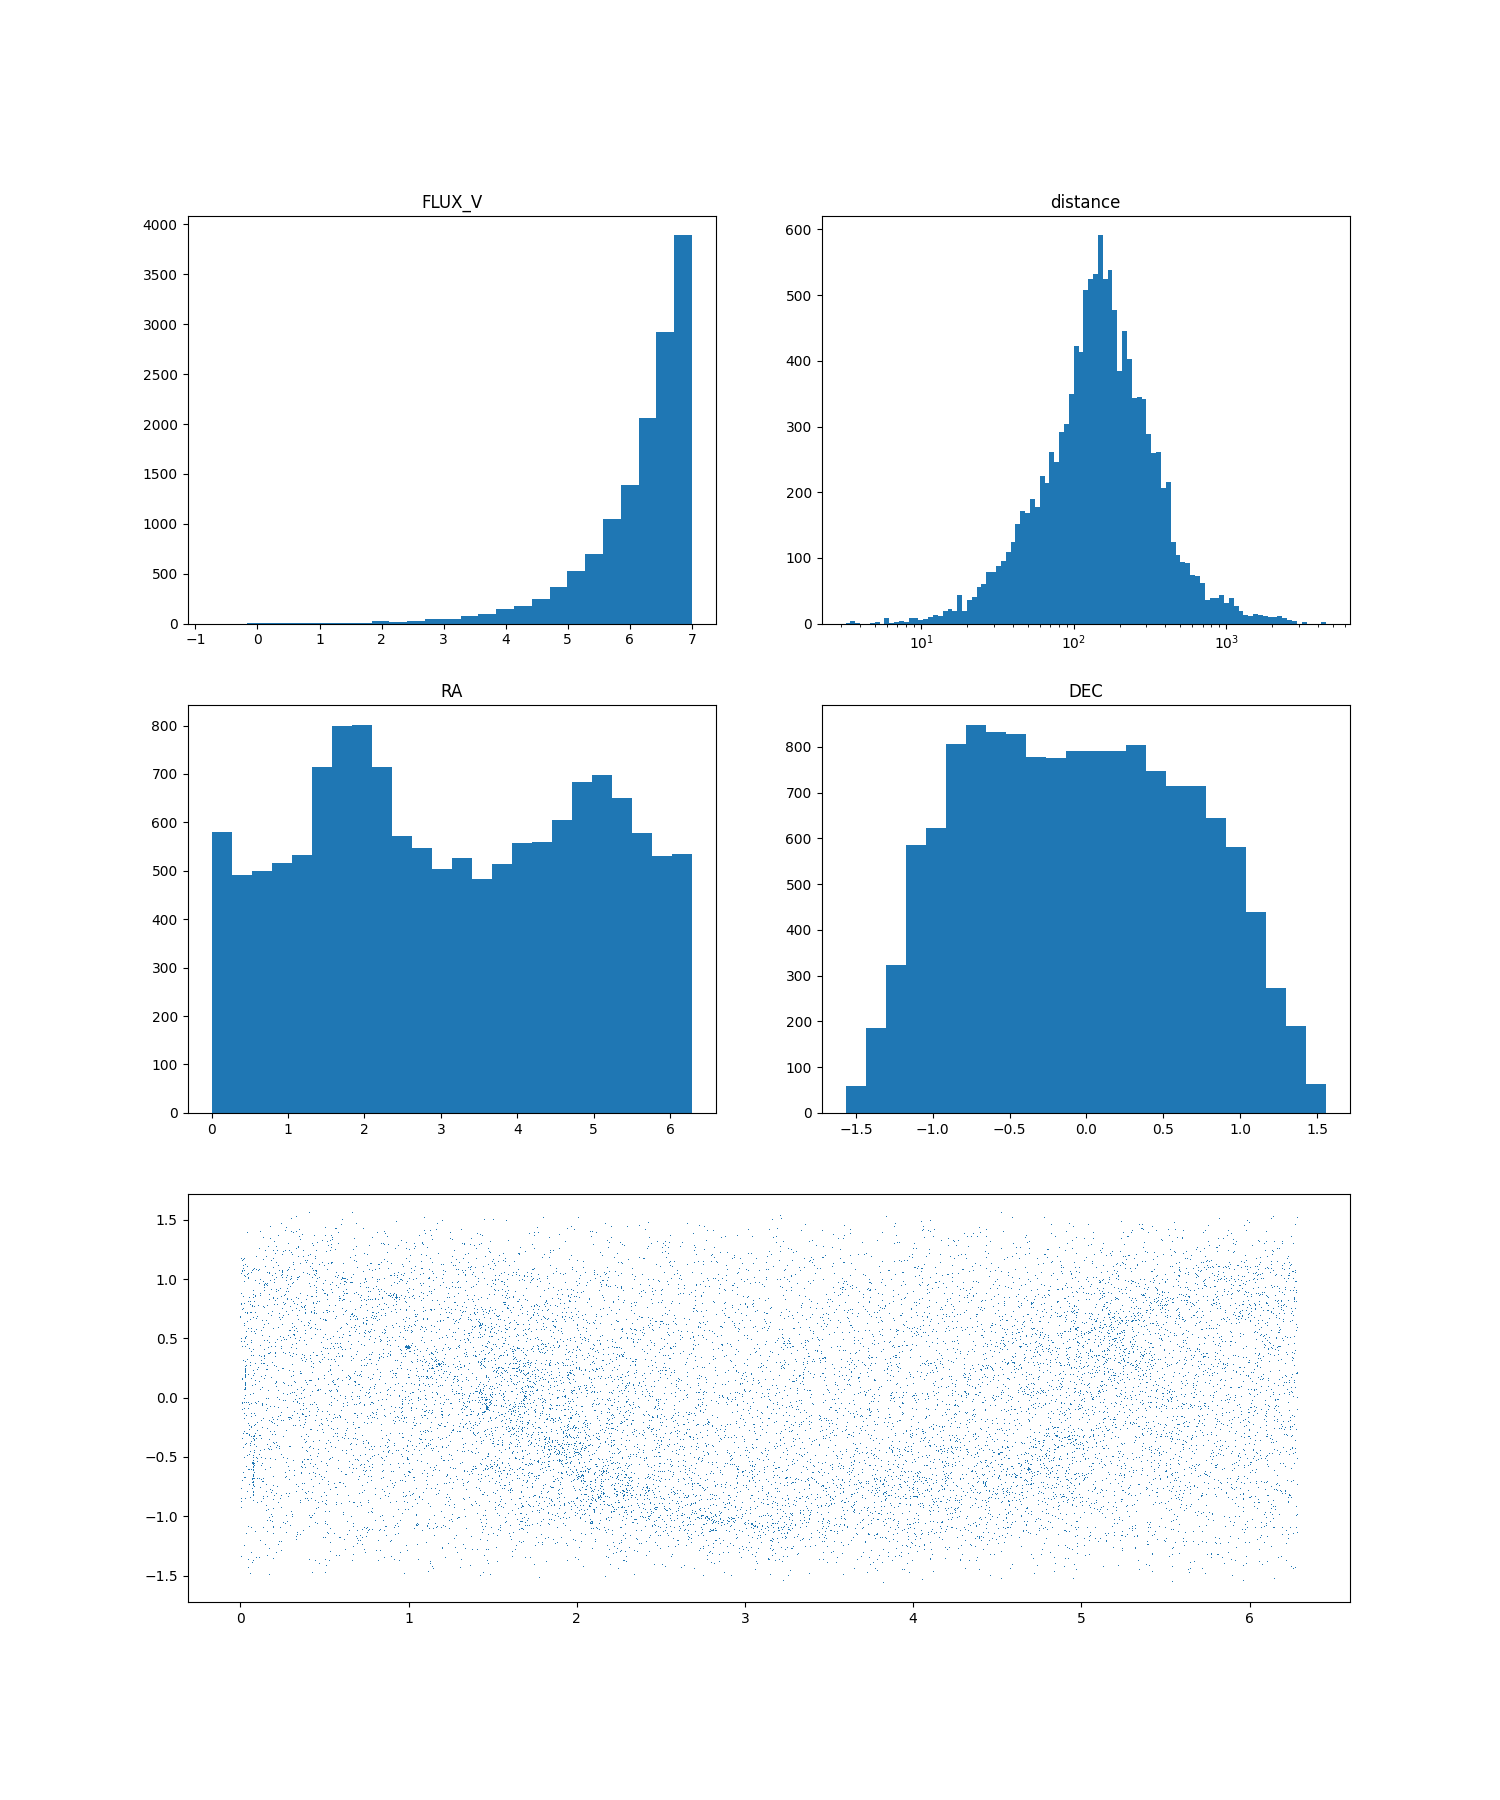

In [22]:
fig = plt.figure(figsize=(15,18))
gs = GridSpec(3, 2)

ax = fig.add_subplot(gs[0,0])
make_hist(df, 'FLUX_V', space=28)
ax = fig.add_subplot(gs[0,1])
ax.set_xscale('log')
make_hist(df, 'distance', space=100, scale="log")
ax = fig.add_subplot(gs[1,0])
make_hist(df, 'RA', convert=ra_to_rad)
ax = fig.add_subplot(gs[1,1])
make_hist(df, 'DEC', convert=dec_to_rad)

ras = [ra_to_rad(r) for r in df['RA']]
dec = [dec_to_rad(d) for d in df['DEC']]

ax = fig.add_subplot(gs[2,:])
plt.plot(ras, dec, ',')

plt.show()

In [11]:
def cartesian(star):
    ra = ra_to_rad(star['RA'])
    dec = dec_to_rad(star['DEC'])
    dist = star['distance'] * units.pc
#     dist *= units.pc if star['Distance_unit'] == 'pc' else units.kpc
    unit = (units.rad, units.rad)
    sc = SkyCoord(ra, dec, unit=unit, distance=dist)
    return sc.cartesian

In [12]:
stars = df[pd.notna(df['distance'])]
locs = [cartesian(s) for i, s in stars.iterrows()]

<IPython.core.display.Javascript object>


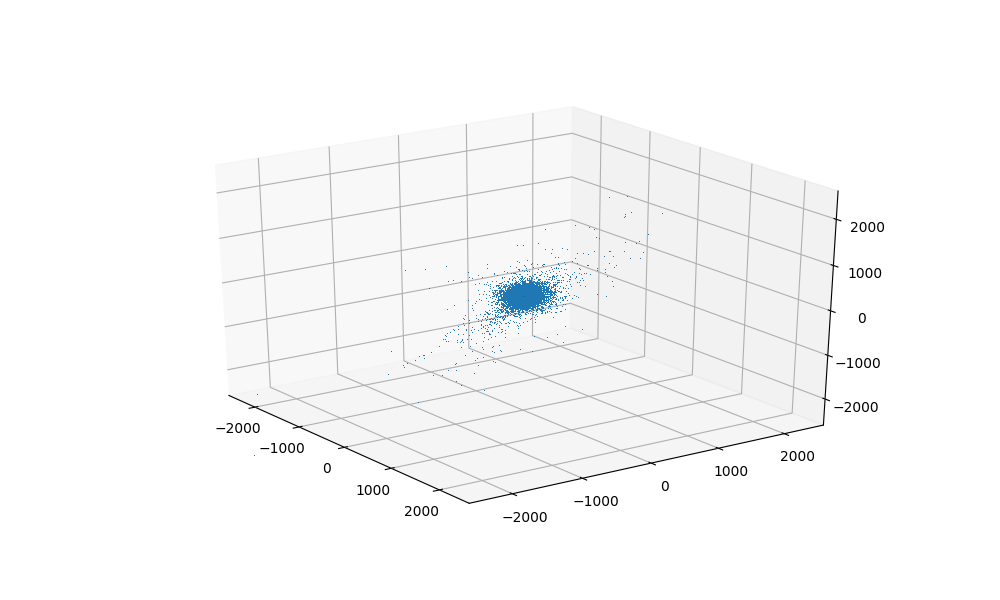

In [26]:
fig = plt.figure(figsize=(10,6))
plt.subplot(1, 1, 1, projection='3d')
xs = [s.x.to(units.pc).value for s in locs]
ys = [s.y.to(units.pc).value for s in locs]
zs = [s.z.to(units.pc).value for s in locs]
axes = plt.gca()
lim = 2500
axes.set_xlim([-lim, lim])
axes.set_ylim([-lim, lim])
axes.set_zlim([-lim, lim])
plt.plot(xs, ys, zs, ',')
plt.plot([0],[0],[0], 'r,')